# Student Final Grade Prediction 
## CU6051NI Artificial Intelligence
### Student:  Saroj Pratap Karki (23047612)

# Data Preparation:  Importing Libraries and Load Data

In [248]:
# Importing all the libraries needed for this project
# pandas helps us work with data tables
# numpy helps with math operations
# matplotlib and seaborn help us make graphs
# sklearn has all the machine learning tools we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_math = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')

df_math['course'] = 'Math'
df_por['course'] = 'Portuguese'

df = pd.concat([df_math, df_por], ignore_index=True)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,Math
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,Math
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,6,Math
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,Math
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,Math


# Data Preparation: Checking the columns along with its datatype

In [249]:
# Checking the basic information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [250]:
# Checking how many rows (students) and columns (features) we have
# The first number is rows, second is columns
df.shape

(1044, 34)

# Data Exploration: Checking for Missing Values

In [251]:
# Checking if any data is missing in our dataset
# Missing data can cause problems for machine learning models
# Luckily, this dataset has no missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
course        0
dtype: int64

# Data Exploration: Checking for duplicate rows

In [253]:
# Checking if there are any duplicate rows in our dataset
# Duplicates can make our model overfit and give wrong results
df.duplicated().sum()

np.int64(0)

# Data Exploration:  Showing the statistical summary of numerical variables

In [192]:

df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Data Cleaning: Removing duplicates to avoid overfitting

In [254]:
# Removing duplicate rows from the dataset
# This ensures each student is only counted once
df = df.drop_duplicates()
df.shape

(1044, 34)

# Data Preparation: Creating Grade Category (Pass/Fail)

In [195]:
# Creating a function to convert the final grade (G3) into Pass or Fail
# In Portuguese schools, a grade of 10 or above is passing
# Below 10 means the student failed

def categorize_grade(g3):
    if g3 < 10:
        return 'Fail'
    else:
        return 'Pass'

df['Grade_Category'] = df['G3']. apply(categorize_grade)
df['Grade_Category'].value_counts()

Grade_Category
Pass    814
Fail    230
Name: count, dtype: int64

# Data Preprocessing: Encoding the target variable (Grade_Category)

In [196]:
# Converting the target variable (Pass/Fail) into numbers
# Machine learning models work with numbers, not text
# Fail becomes 0, Pass becomes 1
target_encoder = LabelEncoder()
target_encoder.fit(['Fail', 'Pass'])
y = target_encoder.transform(df['Grade_Category'])

# Data Preprocessing: Encoding categorical independent variables

In [197]:
# Finding all columns that have text data (categorical columns)
# We need to convert these to numbers for our models to understand
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols. remove('Grade_Category')

df_encoded = df. copy()

for col in categorical_cols: 
    le = LabelEncoder()
    df_encoded[col] = le. fit_transform(df_encoded[col])

df_encoded.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,course,Grade_Category
0,0,0,18,1,0,0,4,4,0,4,...,4,1,1,3,6,5,6,6,0,Fail
1,0,0,17,1,0,1,1,1,0,2,...,3,1,1,3,4,5,5,6,0,Fail
2,0,0,15,1,1,1,1,1,0,2,...,2,2,3,3,10,7,8,10,0,Pass
3,0,0,15,1,0,1,4,2,1,3,...,2,1,1,5,2,15,14,15,0,Pass
4,0,0,16,1,0,1,3,3,2,2,...,2,1,2,5,4,6,10,10,0,Pass


# EDA 1: Distribution of Grade Categories using Bar Graph

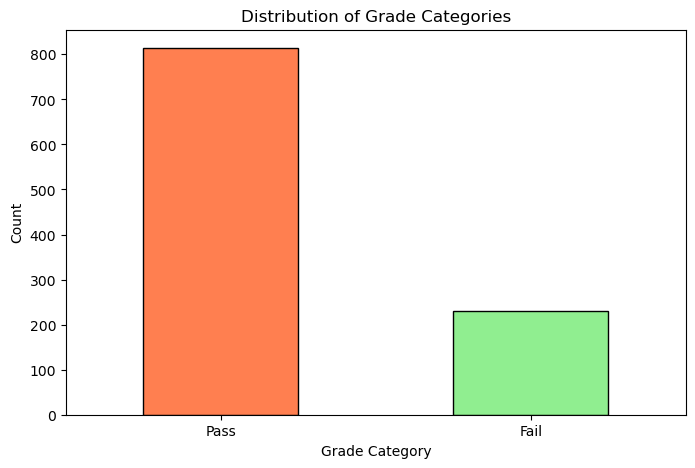

In [198]:
# Creating a bar chart to see how many students passed vs failed
# This helps us understand if our data is balanced or not
# We can see that more students pass than fail

plt.figure(figsize=(8, 5))
df['Grade_Category'].value_counts().plot(kind='bar', color=['coral', 'lightgreen'], edgecolor='black')
plt.title('Distribution of Grade Categories')
plt.xlabel('Grade Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# EDA 2: Distribution of Final Grades (G3)

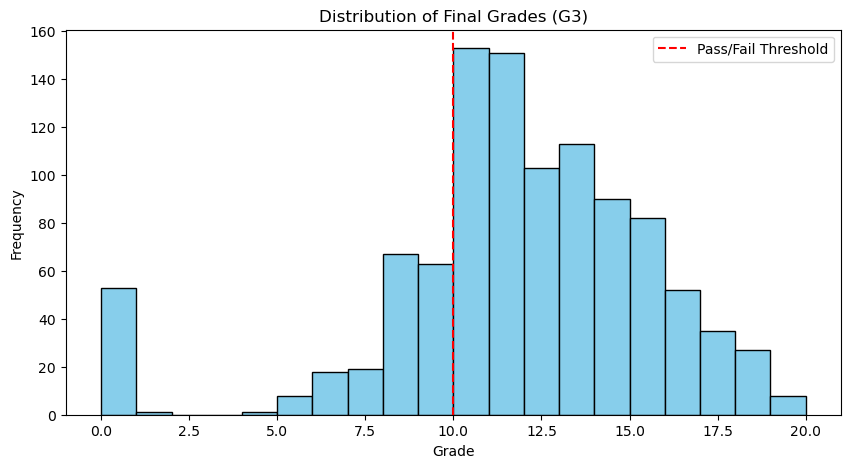

In [199]:
# Creating a histogram to see how final grades are distributed
# The red dashed line shows the pass/fail threshold at grade 10
# We can see most students score between 10-15

plt.figure(figsize=(10, 5))
plt.hist(df['G3'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=10, color='red', linestyle='--', label='Pass/Fail Threshold')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# EDA 3: Correlation Heatmap for numerical features

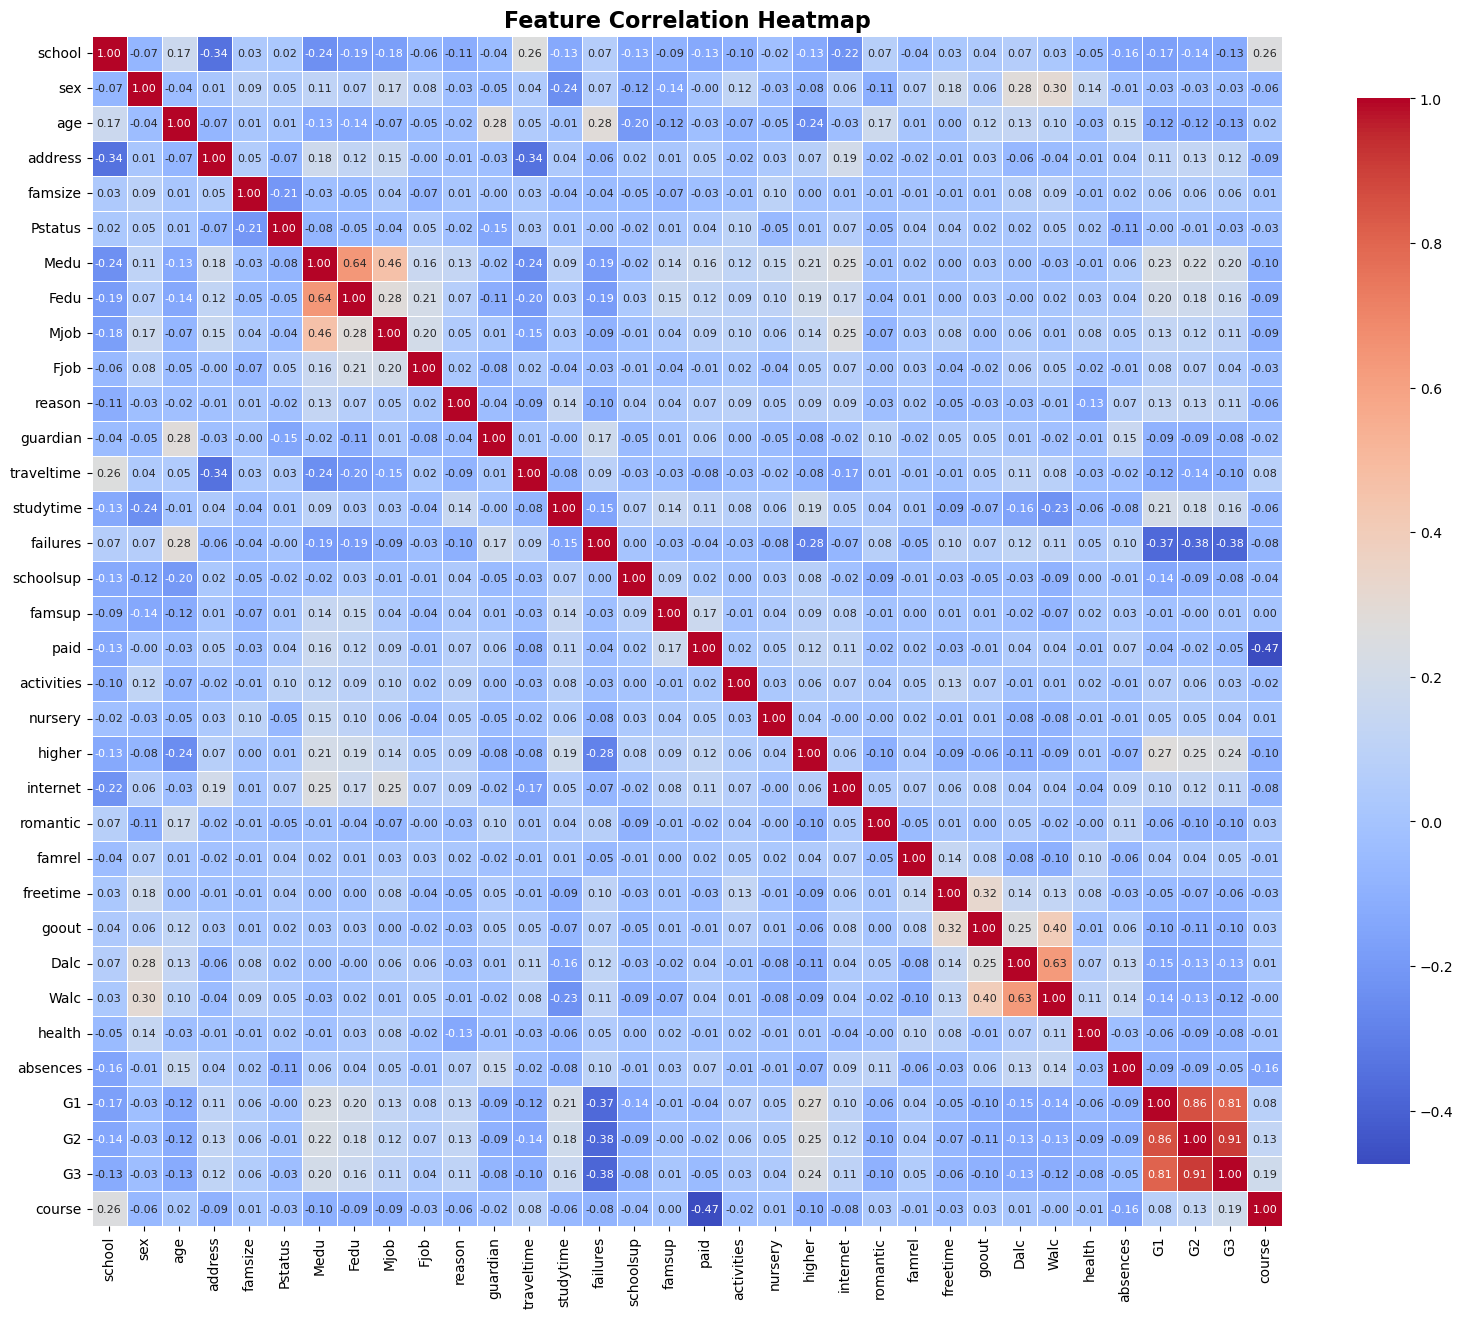

In [200]:
# Creating a heatmap to see how all features are related to each other
# Darker colors mean stronger relationships

numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df_encoded[numerical_cols].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# EDA 4: Correlation with Final Grade (G3)

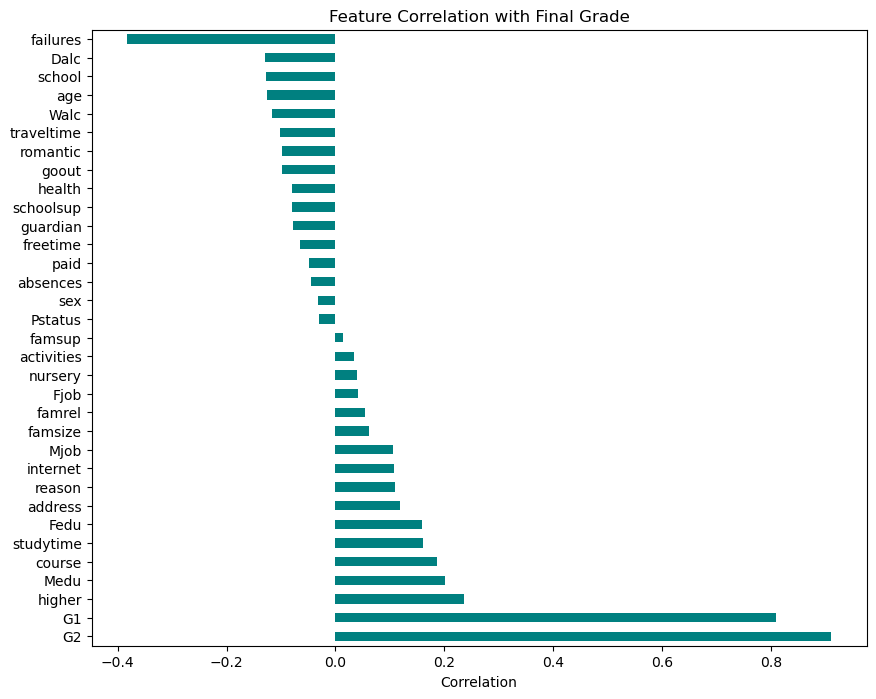

In [201]:
# Showing which features are most related to the final grade (G3)
# Higher bars mean stronger relationship

g3_corr = correlation_matrix['G3'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
g3_corr.drop('G3').plot(kind='barh', color='teal')
plt.title('Feature Correlation with Final Grade')
plt.xlabel('Correlation')
plt.show()

# EDA 5: Distribution of Key Features

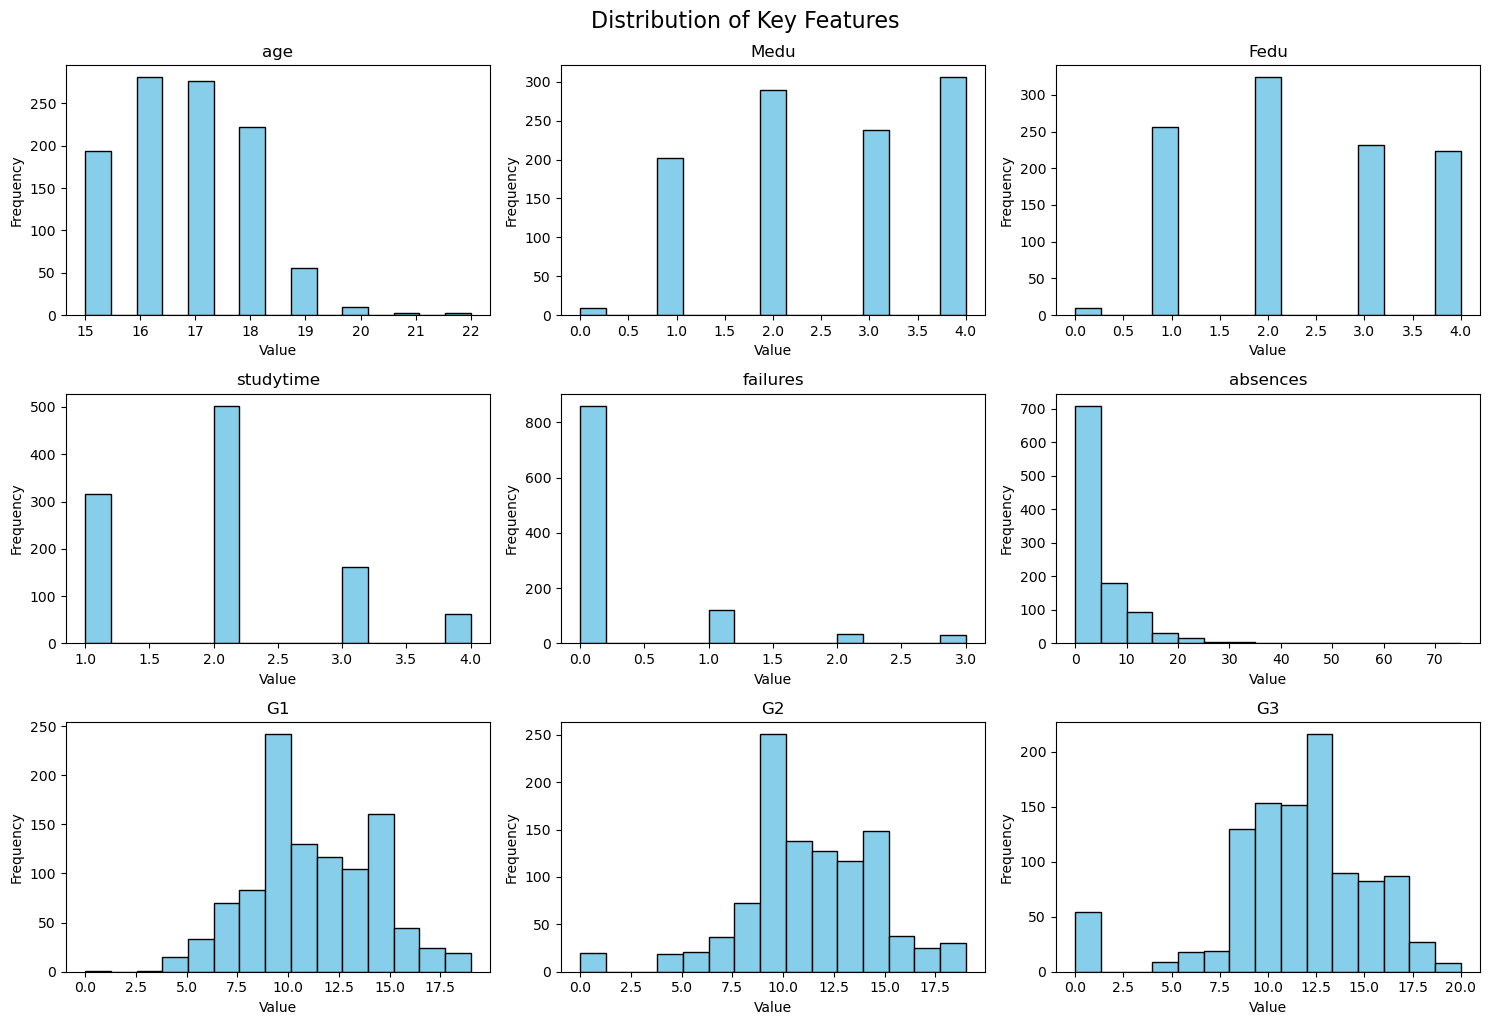

In [202]:
#These are the key features shown in plot

key_features = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_features, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=15, color='skyblue', edgecolor='black')
    plt.title(col, fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of Key Features', fontsize=16, y=1.02)
plt.show()

# EDA 6: Box Plots for Outlier Detection

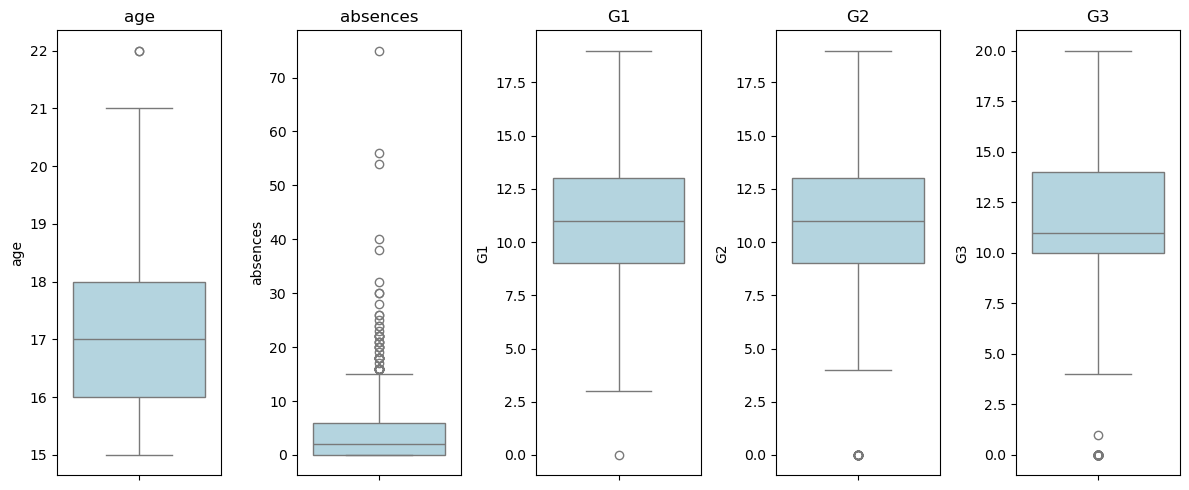

In [203]:
# Creating box plots to check for outliers in our numerical data
# Outliers are extreme values that might affect our model
# The red dots show potential outliers
continuous_cols = ['age', 'absences', 'G1', 'G2', 'G3']

plt.figure(figsize=(12, 5))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)

plt.tight_layout()
plt.show()

# VERSION 1: Prediction WITHOUT G1 and G2 (Early Prediction)
# This version predicts student performance before any exams are taken

## VERSION 1 - Prepare Features (Without G1, G2)

In [204]:
# This is useful for predicting at the START of the semester
# Before any exams have been taken
# We remove G1, G2, G3, and Grade_Category from features
X_v1 = df_encoded.drop(columns=['G1', 'G2', 'G3', 'Grade_Category'])
X_v1.shape

(1044, 31)

# Version 1: Train Test Split

In [205]:
# Splitting our data into training and testing sets for Version 1
# 80% of data is used for training the model
# 20% is kept aside to test how well the model works
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1, y, test_size=0.2, random_state=42, stratify=y)
X_train_v1.shape, X_test_v1.shape

((835, 31), (209, 31))

# VERSION 1 - Feature Scaling

In [206]:
# Scaling all features to have similar ranges
# This is important for KNN which uses distance calculations
# StandardScaler converts data to have mean=0 and std=1
scaler_v1 = StandardScaler()
X_train_v1_scaled = scaler_v1.fit_transform(X_train_v1)
X_test_v1_scaled = scaler_v1.transform(X_test_v1)

# VERSION 1: KNN Model

In [213]:
# Training the KNN (K-Nearest Neighbors) model for Version 1
# KNN predicts by finding the 5 most similar students
print("KNN Model (Version 1 - Without G1, G2)")
knn_model_v1 = KNeighborsClassifier(n_neighbors=5)
knn_model_v1.fit(X_train_v1_scaled, y_train_v1)
knn_pred_v1 = knn_model_v1.predict(X_test_v1_scaled)

knn_accuracy_v1 = accuracy_score(y_test_v1, knn_pred_v1)
print(f"KNN Accuracy (Version 1): {knn_accuracy_v1 * 100:.2f}%")
print(classification_report(y_test_v1, knn_pred_v1, target_names=['Fail', 'Pass']))

KNN Model (Version 1 - Without G1, G2)
KNN Accuracy (Version 1): 79.90%
              precision    recall  f1-score   support

        Fail       0.61      0.24      0.34        46
        Pass       0.82      0.96      0.88       163

    accuracy                           0.80       209
   macro avg       0.71      0.60      0.61       209
weighted avg       0.77      0.80      0.76       209



# VERSION 1: Random Forest Model

In [214]:
# Training the Random Forest model for Version 1
# Random Forest creates 100 decision trees and combines their predictions
# This is called "bagging" - it helps reduce errors

print("Random Forest Model (Version 1 - Without G1, G2)")

rf_model_v1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_v1.fit(X_train_v1_scaled, y_train_v1)

rf_pred_v1 = rf_model_v1.predict(X_test_v1_scaled)

rf_accuracy_v1 = accuracy_score(y_test_v1, rf_pred_v1)
print(f"\nAccuracy: {rf_accuracy_v1 * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test_v1, rf_pred_v1, target_names=['Fail', 'Pass']))

Random Forest Model (Version 1 - Without G1, G2)

Accuracy: 79.43%

Classification Report:
              precision    recall  f1-score   support

        Fail       0.58      0.24      0.34        46
        Pass       0.82      0.95      0.88       163

    accuracy                           0.79       209
   macro avg       0.70      0.60      0.61       209
weighted avg       0.76      0.79      0.76       209



# VERSION 1: AdaBoost Model

In [215]:
# Training the AdaBoost model for Version 1
# AdaBoost trains 100 weak models one after another
# Each new model focuses on fixing mistakes from previous ones
# This is called "boosting"
base_tree_v1 = DecisionTreeClassifier(max_depth=3, random_state=42)
ada_model_v1 = AdaBoostClassifier(estimator=base_tree_v1, n_estimators=100, random_state=42)
ada_model_v1.fit(X_train_v1_scaled, y_train_v1)
ada_pred_v1 = ada_model_v1.predict(X_test_v1_scaled)

ada_accuracy_v1 = accuracy_score(y_test_v1, ada_pred_v1)
print(f"AdaBoost Accuracy (Version 1): {ada_accuracy_v1 * 100:.2f}%")
print(classification_report(y_test_v1, ada_pred_v1, target_names=['Fail', 'Pass']))

AdaBoost Accuracy (Version 1): 77.99%
              precision    recall  f1-score   support

        Fail       0.50      0.33      0.39        46
        Pass       0.83      0.91      0.87       163

    accuracy                           0.78       209
   macro avg       0.66      0.62      0.63       209
weighted avg       0.75      0.78      0.76       209



# VERSION 1: Feature Importance from AdaBoost

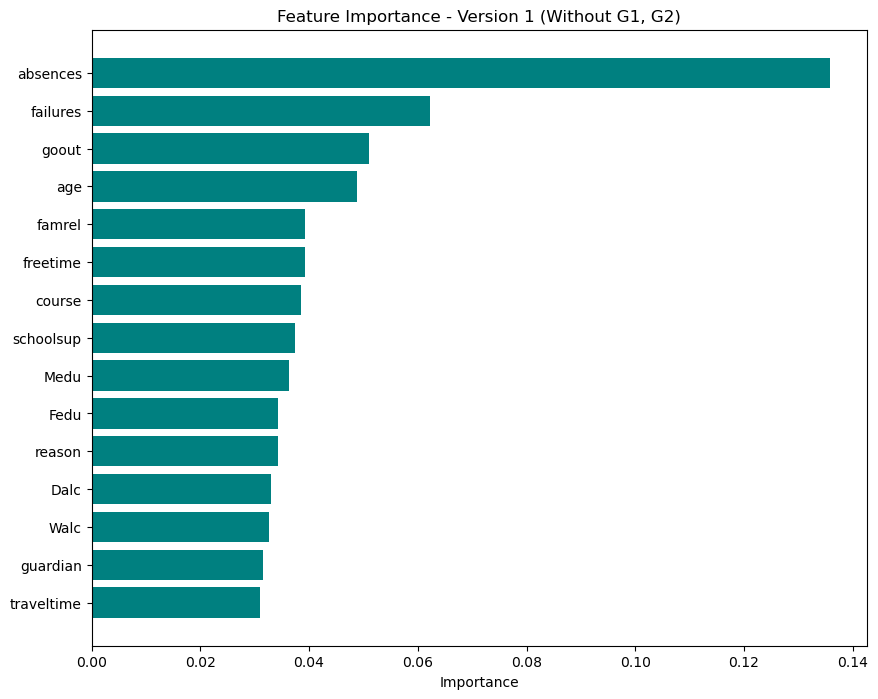

In [246]:
# Checking which features are most important for making predictions
# Random Forest can tell us which features it used the most
# Higher importance means that feature has more impact on the prediction
feature_importance_v1 = pd.DataFrame({
    'Feature': X_v1.columns,
    'Importance': ada_model_v1.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_v1['Feature'][:15], feature_importance_v1['Importance'][:15], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importance - Version 1 (Without G1, G2)')
plt.gca().invert_yaxis()
plt.show()

# VERSION 1: Model Comparison

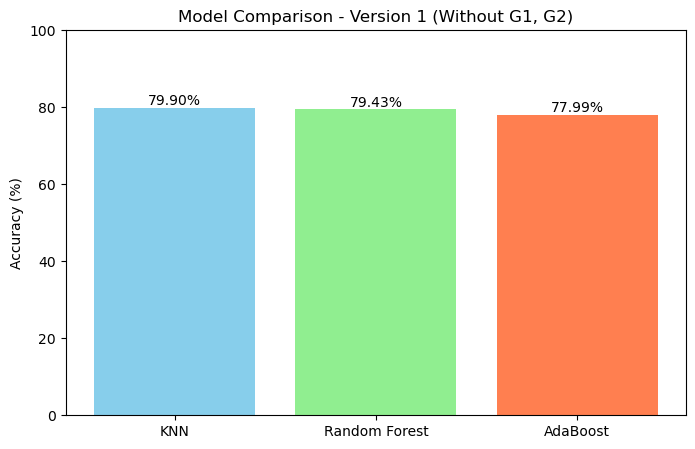

In [217]:
# Comparing all three models to see which one performs best
# We put the accuracies in a table and create a bar chart
# This helps us decide which model to use for Version 1

comparison_v1 = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'AdaBoost'],
    'Accuracy': [knn_accuracy_v1 * 100, rf_accuracy_v1 * 100, ada_accuracy_v1 * 100]
})

plt.figure(figsize=(8, 5))
bars = plt.bar(comparison_v1['Model'], comparison_v1['Accuracy'], color=['skyblue', 'lightgreen', 'coral'])
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison - Version 1 (Without G1, G2)')
plt.ylim([0, 100])

# Adding the accuracy percentage on top of each bar here in this loop so those percentage can be seen perfectly there
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

# VERSION 1: Confusion Matrix for Best Model

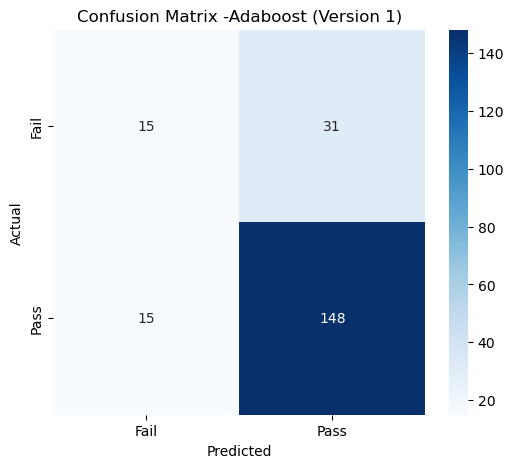

In [240]:
# Creating a confusion matrix to see where the model makes mistakes
# It shows how many students were correctly/incorrectly classified
# The diagonal shows correct predictions

cm_v1 = confusion_matrix(y_test_v1, ada_pred_v1)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_v1, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix -Adaboost (Version 1)')
plt.show()

# VERSION 2: Prediction WITH G1 and G2 (After Midterm Prediction)
# This version uses early grades for more accurate prediction

In [219]:
# This is useful for predicting AFTER the first two exams
# G1 and G2 give us information about how the student performed so far
# We only remove G3 and Grade_Category from features

X_v2 = df_encoded.drop(columns=['G3', 'Grade_Category'])
X_v2.shape

(1044, 33)

# Version 2: Splitting data and scaling features

In [220]:
# Splitting our data into training and testing sets for Version 2
# Same process as Version 1 but with more features (including G1, G2)

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y, test_size=0.2, random_state=42, stratify=y)
X_train_v2.shape, X_test_v2.shape

((835, 33), (209, 33))

# VERSION 2 - Feature Scaling

In [221]:
# Scaling all features for Version 2
# We create a new scaler because Version 2 has different features

scaler_v2 = StandardScaler()
X_train_v2_scaled = scaler_v2.fit_transform(X_train_v2)
X_test_v2_scaled = scaler_v2.transform(X_test_v2)

# VERSION 2: KNN Model

In [222]:
# Training the KNN model for Version 2
# Now the model can use G1 and G2 to find similar students
# This should give better accuracy than Version 1 as this has more datas 

knn_model_v2 = KNeighborsClassifier(n_neighbors=5)
knn_model_v2.fit(X_train_v2_scaled, y_train_v2)
knn_pred_v2 = knn_model_v2.predict(X_test_v2_scaled)

knn_accuracy_v2 = accuracy_score(y_test_v2, knn_pred_v2)
print(f"KNN Accuracy (Version 2): {knn_accuracy_v2 * 100:.2f}%")
print(classification_report(y_test_v2, knn_pred_v2, target_names=['Fail', 'Pass']))

KNN Accuracy (Version 2): 85.17%
              precision    recall  f1-score   support

        Fail       0.80      0.43      0.56        46
        Pass       0.86      0.97      0.91       163

    accuracy                           0.85       209
   macro avg       0.83      0.70      0.74       209
weighted avg       0.85      0.85      0.83       209



# VERSION 2: Random Forest Model

In [223]:
# Training the Random Forest model for Version 2
# With G1 and G2 included, Random Forest should perform much better
# Because early grades are strong predictors of final grades

rf_model_v2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_v2.fit(X_train_v2_scaled, y_train_v2)
rf_pred_v2 = rf_model_v2.predict(X_test_v2_scaled)

rf_accuracy_v2 = accuracy_score(y_test_v2, rf_pred_v2)
print(f"Random Forest Accuracy (Version 2): {rf_accuracy_v2 * 100:.2f}%")
print(classification_report(y_test_v2, rf_pred_v2, target_names=['Fail', 'Pass']))

Random Forest Accuracy (Version 2): 89.95%
              precision    recall  f1-score   support

        Fail       0.76      0.80      0.78        46
        Pass       0.94      0.93      0.93       163

    accuracy                           0.90       209
   macro avg       0.85      0.87      0.86       209
weighted avg       0.90      0.90      0.90       209



# VERSION 2: AdaBoost Model

In [226]:
# Training the AdaBoost model for Version 2
# AdaBoost should also improve with G1 and G2 available
base_tree_v2 = DecisionTreeClassifier(max_depth=3, random_state=42)
ada_model_v2 = AdaBoostClassifier(estimator=base_tree_v2, n_estimators=100, learning_rate=1.0, random_state=42)
ada_model_v2.fit(X_train_v2_scaled, y_train_v2)

ada_pred_v2 = ada_model_v2.predict(X_test_v2_scaled)

ada_accuracy_v2 = accuracy_score(y_test_v2, ada_pred_v2)
print(f"Adaboost Accuracy (Version 2): {ada_accuracy_v2 * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test_v2, ada_pred_v2, target_names=['Fail', 'Pass']))

Adaboost Accuracy (Version 2): 90.43%

Classification Report:
              precision    recall  f1-score   support

        Fail       0.80      0.76      0.78        46
        Pass       0.93      0.94      0.94       163

    accuracy                           0.90       209
   macro avg       0.86      0.85      0.86       209
weighted avg       0.90      0.90      0.90       209



# VERSION 2: Feature Importance from AdaBoost

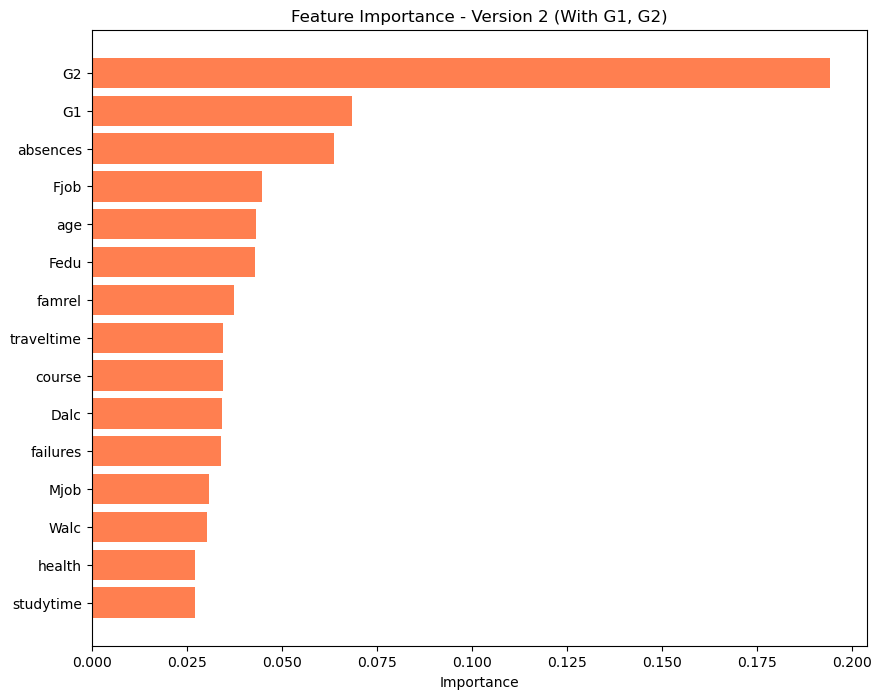

In [247]:
# Checking which features are most important in Version 2
# We expect G1 and G2 to be at the top since they are directly related to G3
feature_importance_v2 = pd.DataFrame({
    'Feature': X_v2.columns,
    'Importance': ada_model_v2.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_v2['Feature'][:15], feature_importance_v2['Importance'][:15], color='coral')
plt.xlabel('Importance')
plt.title('Feature Importance - Version 2 (With G1, G2)')
plt.gca().invert_yaxis()
plt.show()

# VERSION 2: Model Comparison

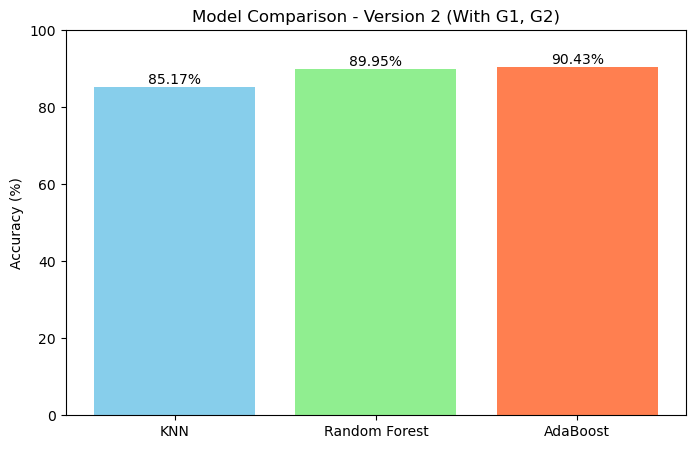

In [228]:
# Comparing all three models for Version 2
# We expect higher accuracy than Version 1 because we have more information
comparison_v2 = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'AdaBoost'],
    'Accuracy': [knn_accuracy_v2 * 100, rf_accuracy_v2 * 100, ada_accuracy_v2 * 100]
})

plt.figure(figsize=(8, 5))
bars = plt.bar(comparison_v2['Model'], comparison_v2['Accuracy'], color=['skyblue', 'lightgreen', 'coral'])
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison - Version 2 (With G1, G2)')
plt.ylim([0, 100])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

# VERSION 2: Confusion Matrix for Best Model

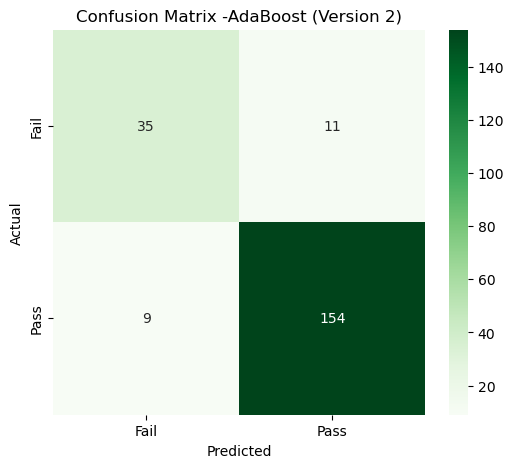

In [241]:
# This metrics should see fewer mistakes compared to Version 1
cm_v2 = confusion_matrix(y_test_v2, ada_pred_v2)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_v2, annot=True, fmt='d', cmap='Greens', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix -AdaBoost (Version 2)')
plt.show()

# OVERALL COMPARISON:  Version 1 vs Version 2

In [242]:
# Creating a table to compare Version 1 and Version 2 results side by side
# This shows how much better Version 2 performs
overall_comparison = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'AdaBoost'],
    'Version 1 (Without G1,G2)': [knn_accuracy_v1 * 100, rf_accuracy_v1 * 100, ada_accuracy_v1 * 100],
    'Version 2 (With G1,G2)': [knn_accuracy_v2 * 100, rf_accuracy_v2 * 100, ada_accuracy_v2 * 100]
})

overall_comparison

,Model,"Version 1 (Without G1,G2)","Version 2 (With G1,G2)"
0,KNN,79.904306,85.167464
1,Random Forest,79.425837,89.952153
2,AdaBoost,77.990431,90.430622


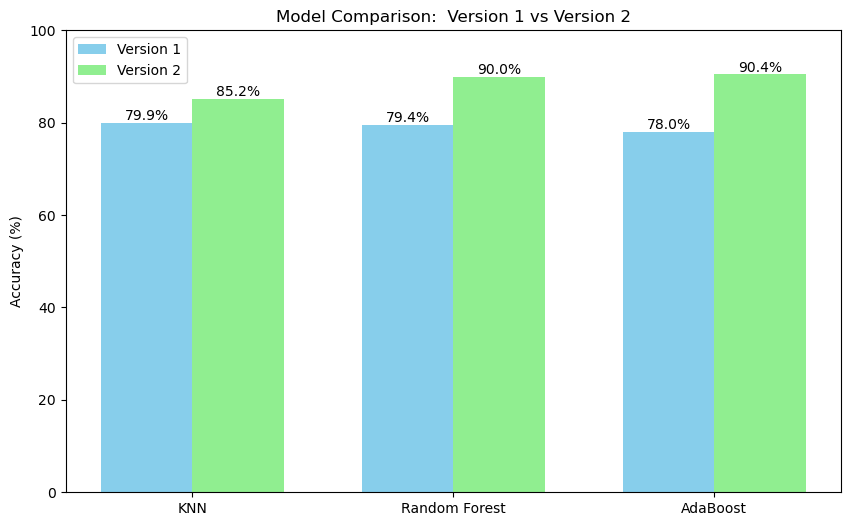

In [232]:
# Creating a grouped bar chart to visualize Version 1 vs Version 2
x = np.arange(3)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, overall_comparison['Version 1 (Without G1,G2)'], width, label='Version 1', color='skyblue')
bars2 = ax.bar(x + width/2, overall_comparison['Version 2 (With G1,G2)'], width, label='Version 2', color='lightgreen')

ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Comparison:  Version 1 vs Version 2')
ax.set_xticks(x)
ax.set_xticklabels(['KNN', 'Random Forest', 'AdaBoost'])
ax.legend()
ax.set_ylim([0, 100])

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()

# PREDICTION: New Student - Version 1 (Early Prediction)

In [244]:
# Predicting the grade for a new student using Version 1 (Early Prediction)
# This is like predicting at the start of semester before any exams

new_student_v1 = pd.DataFrame(columns=X_v1.columns)
new_student_v1.loc[0] = 0

new_student_v1['age'] = 17
new_student_v1['Medu'] = 3
new_student_v1['Fedu'] = 2
new_student_v1['traveltime'] = 1
new_student_v1['studytime'] = 2
new_student_v1['failures'] = 0
new_student_v1['famrel'] = 4
new_student_v1['freetime'] = 3
new_student_v1['goout'] = 2
new_student_v1['Dalc'] = 1
new_student_v1['Walc'] = 2
new_student_v1['health'] = 4
new_student_v1['absences'] = 5

new_student_v1_scaled = scaler_v1.transform(new_student_v1)
prediction_v1 = ada_model_v1.predict(new_student_v1_scaled)
prediction_label_v1 = target_encoder.inverse_transform(prediction_v1)

print(f"Predicted Grade (Version 1 - Early Prediction): {prediction_label_v1[0]}")

Predicted Grade (Version 1 - Early Prediction): Pass


# PREDICTION: New Student - Version 2 (After Midterm)

In [245]:
# Predicting the grade for the same student using Version 2 (After Midterm)
# Now we have their G1 and G2 grades, so prediction should be more accurate
# G1=8 and G2=9 means the student is struggling (below passing threshold of 10)

new_student_v2 = pd.DataFrame(columns=X_v2.columns)
new_student_v2.loc[0] = 0

new_student_v2['age'] = 17
new_student_v2['Medu'] = 3
new_student_v2['Fedu'] = 2
new_student_v2['traveltime'] = 1
new_student_v2['studytime'] = 2
new_student_v2['failures'] = 0
new_student_v2['famrel'] = 4
new_student_v2['freetime'] = 3
new_student_v2['goout'] = 2
new_student_v2['Dalc'] = 1
new_student_v2['Walc'] = 2
new_student_v2['health'] = 4
new_student_v2['absences'] = 5
new_student_v2['G1'] = 8
new_student_v2['G2'] = 9

new_student_v2_scaled = scaler_v2.transform(new_student_v2)
prediction_v2 = ada_model_v2.predict(new_student_v2_scaled)
prediction_label_v2 = target_encoder.inverse_transform(prediction_v2)

print(f"Predicted Grade (Version 2 - After midexam): {prediction_label_v2[0]}")

Predicted Grade (Version 2 - After midexam): Fail
